In [27]:
import serial
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize

In [28]:
# Note 1: This python script was designed to run with Python 3.
#
# Note 2: The script uses "pyserial" which must be installed.  If you have
#         previously installed the "serial" package, it must be uninstalled
#         first.
#
# Note 3: While this script is running you can not re-program the Arduino.
#         Before downloading a new Arduino sketch, you must exit this
#         script first.
arduinoComPort = "COM5"


# Set the baud rate
# NOTE1: The baudRate for the sending and receiving programs must be the same!
# NOTE2: For faster communication, set the baudRate to 115200 below
#        and check that the arduino sketch you are using is updated as well.
baudRate = 9600


# open the serial port
serialPort = serial.Serial(arduinoComPort, baudRate, timeout=1)


panMin = 0
panMax = 70
panStep = 1
tiltMin = 0
tiltMax = 0
tiltStep = 0
numRows = int(((panMax-panMin)/panStep +1))
ptsrData = [[0]*4] * numRows
# print(ptsrData)
# ptsrData.astype(int)
# print(ptsrData)

i = 0
# main loop to read data from the Arduino, then display it
while i < numRows:
    # print(ptsrData)
    # ask for a line of data from the serial port, the ".decode()" converts the
    # data from an "array of bytes", to a string
    lineOfData = serialPort.readline().decode()

    # check if data was received
    if len(lineOfData) > 0:
        # print(lineOfData)
        # print(len(lineOfData))

        if len(lineOfData) == 3:
            if int(lineOfData) == 1: # done with scan
                print(ptsrData)
                i = numRows
            elif int(lineOfData) == 0: # restarting scan
                ptsrData = np.zeros((numRows,4))
                i = 0
        else: # continue with this scan
            # data was received, convert it into 4 integers
            panPos, tiltPos, senseVal = (int(x) for x in lineOfData.split(','))

            # # print the results
            # print("panPos = " + str(panPos), end="")
            # print(", tiltPos = " + str(tiltPos), end="")
            # print(", senseVal = " + str(senseVal))
            print([panPos, tiltPos, senseVal, 0.0])
            ptsrData[i] = [panPos, tiltPos, senseVal, 0.0]
            i = i+1

[0, 43, 31, 0.0]
[2, 43, 4, 0.0]
[4, 43, 5, 0.0]
[6, 43, 7, 0.0]
[8, 43, 4, 0.0]
[10, 43, 4, 0.0]
[12, 43, 4, 0.0]
[14, 43, 7, 0.0]
[16, 43, 39, 0.0]
[18, 43, 0, 0.0]
[20, 43, 287, 0.0]
[22, 43, 196, 0.0]
[24, 43, 183, 0.0]
[26, 43, 191, 0.0]
[28, 43, 176, 0.0]
[30, 43, 179, 0.0]
[32, 43, 176, 0.0]
[34, 43, 126, 0.0]
[36, 43, 7, 0.0]
[38, 43, 19, 0.0]
[40, 43, 16, 0.0]
[42, 43, 4, 0.0]
[44, 43, 4, 0.0]
[46, 43, 5, 0.0]
[48, 43, 8, 0.0]
[50, 43, 4, 0.0]
[52, 43, 4, 0.0]
[54, 43, 4, 0.0]
[56, 43, 6, 0.0]
[58, 43, 15, 0.0]
[60, 43, 0, 0.0]
[62, 43, 4, 0.0]
[64, 43, 5, 0.0]
[66, 43, 9, 0.0]
[68, 43, 29, 0.0]
[70, 43, 5, 0.0]
[[0, 43, 31, 0.0], [2, 43, 4, 0.0], [4, 43, 5, 0.0], [6, 43, 7, 0.0], [8, 43, 4, 0.0], [10, 43, 4, 0.0], [12, 43, 4, 0.0], [14, 43, 7, 0.0], [16, 43, 39, 0.0], [18, 43, 0, 0.0], [20, 43, 287, 0.0], [22, 43, 196, 0.0], [24, 43, 183, 0.0], [26, 43, 191, 0.0], [28, 43, 176, 0.0], [30, 43, 179, 0.0], [32, 43, 176, 0.0], [34, 43, 126, 0.0], [36, 43, 7, 0.0], [38, 43, 19, 0.

In [29]:
# print(ptsrData)
ptsrNP = np.array(ptsrData)
print(ptsrNP)


[[  0.  43.  31.   0.]
 [  2.  43.   4.   0.]
 [  4.  43.   5.   0.]
 [  6.  43.   7.   0.]
 [  8.  43.   4.   0.]
 [ 10.  43.   4.   0.]
 [ 12.  43.   4.   0.]
 [ 14.  43.   7.   0.]
 [ 16.  43.  39.   0.]
 [ 18.  43.   0.   0.]
 [ 20.  43. 287.   0.]
 [ 22.  43. 196.   0.]
 [ 24.  43. 183.   0.]
 [ 26.  43. 191.   0.]
 [ 28.  43. 176.   0.]
 [ 30.  43. 179.   0.]
 [ 32.  43. 176.   0.]
 [ 34.  43. 126.   0.]
 [ 36.  43.   7.   0.]
 [ 38.  43.  19.   0.]
 [ 40.  43.  16.   0.]
 [ 42.  43.   4.   0.]
 [ 44.  43.   4.   0.]
 [ 46.  43.   5.   0.]
 [ 48.  43.   8.   0.]
 [ 50.  43.   4.   0.]
 [ 52.  43.   4.   0.]
 [ 54.  43.   4.   0.]
 [ 56.  43.   6.   0.]
 [ 58.  43.  15.   0.]
 [ 60.  43.   0.   0.]
 [ 62.  43.   4.   0.]
 [ 64.  43.   5.   0.]
 [ 66.  43.   9.   0.]
 [ 68.  43.  29.   0.]
 [ 70.  43.   5.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.

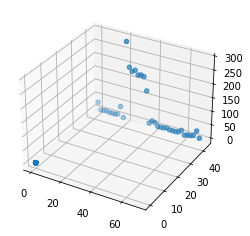

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(ptsrNP[:,0], ptsrNP[:,1], ptsrNP[:,2])


[[ 20.32 460.  ]
 [ 22.86 435.  ]
 [ 25.4  405.  ]
 [ 27.94 375.  ]
 [ 30.48 355.  ]
 [ 33.02 330.  ]
 [ 35.56 310.  ]
 [ 38.1  295.  ]
 [ 40.64 273.  ]
 [ 50.8  211.  ]
 [ 60.96 173.  ]
 [ 71.12 157.  ]
 [ 81.28 138.  ]
 [ 91.44 110.  ]
 [101.6  102.  ]
 [111.76  95.  ]
 [121.92  82.  ]
 [132.08  65.  ]
 [142.24  50.  ]
 [152.4   40.  ]]
[-3.64092814e-13  6.06928427e-10 -3.92946032e-07  1.21086134e-04
 -1.63738052e-02  1.69784848e-01  1.63890239e+02]
[[  0.          43.          31.         152.4       ]
 [  2.          43.           4.         152.4       ]
 [  4.          43.           5.         152.4       ]
 [  6.          43.           7.         152.4       ]
 [  8.          43.           4.         152.4       ]
 [ 10.          43.           4.         152.4       ]
 [ 12.          43.           4.         152.4       ]
 [ 14.          43.           7.         152.4       ]
 [ 16.          43.          39.         152.4       ]
 [ 18.          43.           0.         152.4   

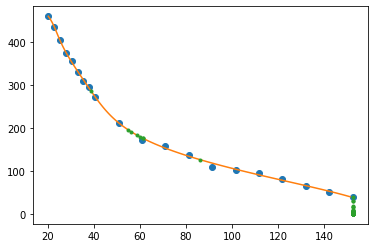

In [31]:
dsNP = np.load("calibration_data_0.npy")

print(dsNP)

c = np.polyfit(dsNP[:,1],dsNP[:,0],6)
print(c)

xp = np.linspace(np.amin(dsNP[:,1]),np.amax(dsNP[:,1]), 100)
# xp = np.linspace(0,400, 100)
p = np.poly1d(c)

i = 0
while i < numRows:
    if ptsrNP[i,2]>np.amax(dsNP[:,1]):
        ptsrNP[i,3] = np.amin(dsNP[:,0])
    elif ptsrNP[i,2]<np.amin(dsNP[:,1]):
        ptsrNP[i,3] = np.amax(dsNP[:,0])
    else:
        ptsrNP[i,3] = p(ptsrNP[i,2])
    i = i+1

# i = 0
# while i < numRows:
#     if ptsrNP[i,3]>100:
#         ptsrNP[i,3] = 0
#     elif ptsrNP[i,3]<10:
#         ptsrNP[i,3] = 0
#     else:
#         ptsrNP[i,3] = p(ptsrNP[i,2])
#     i = i+1

print(ptsrNP)

fig = plt.figure()
ax = plt.axes()
plt.plot(dsNP[:,0],dsNP[:,1], 'o', p(xp),xp, '-',ptsrNP[:,3],ptsrNP[:,2],'.')

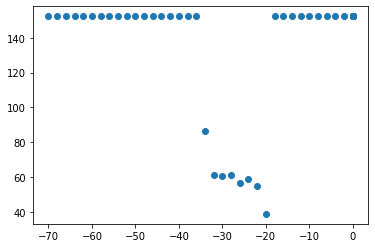

In [36]:
fig = plt.figure()
ax = plt.axes()
plt.plot(-ptsrNP[:,0],ptsrNP[:,3], 'o')

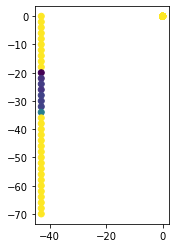

In [33]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(-ptsrNP[:,1],-ptsrNP[:,0],s=None,c=ptsrNP[:,3])
ax.set_aspect('equal', 'box')

In [34]:
np.save("scan1",ptsrNP)

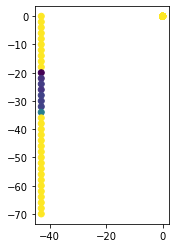

In [35]:
ptsrNP_loaded = np.load("scan1.npy")
fig = plt.figure()
ax = plt.axes()
plt.scatter(-ptsrNP_loaded[:,1],-ptsrNP_loaded[:,0],s=None,c=ptsrNP_loaded[:,3])
ax.set_aspect('equal', 'box')